In [1]:
import glob
import numpy as np
import plotly as py
import cufflinks as cf
import pandas as pd
%matplotlib inline

In [2]:
path_to_eval_logs = "../eval/20190327_RetinaNet_train_A_over_ganaug_050_augonlyasbase_eval/test_day"
plot_title = "Train-A-Over-GANaug-050-augonlyasbase @ Test-Day"

In [3]:
logs = glob.glob(path_to_eval_logs + "/**/*.txt", recursive = True)

In [4]:
df_iterations = pd.DataFrame()
last_iteration = -1
for log in logs:
    df = pd.read_csv(log)
    df = df.drop(columns = ["Unnamed: 12"])
    df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
    df_iterations = pd.concat([df_iterations, df], axis = 0)
    df_iterations = df_iterations.reset_index(drop = True)
    last_iteration = df["Iteration"]
df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)

In [5]:
df_iterations.head(3)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Iteration
0,0.191098,0.421439,0.153924,0.073038,0.356020,0.362105,0.070597,0.252297,0.289143,0.166848,0.474189,0.437321,2500
1,0.225477,0.490081,0.182719,0.100020,0.401589,0.386077,0.079388,0.278015,0.316253,0.197128,0.500619,0.456507,5000
2,0.243350,0.518207,0.203105,0.113085,0.426293,0.411353,0.083094,0.296787,0.336139,0.213277,0.522518,0.471181,7500


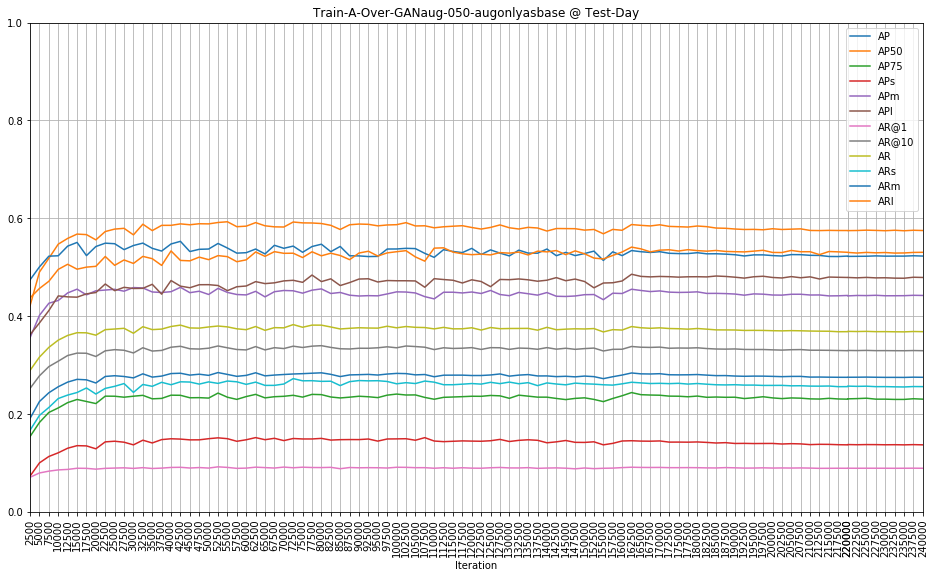

In [6]:
df_iterations.plot(x = 'Iteration', y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], xticks = df_iterations["Iteration"], rot = 90, ylim = (0, 1), title = plot_title, grid = True, figsize = (16, 9))

In [7]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": plot_title,
    "xaxis": {
        "title": "Iteration",
        "tickvals": df_iterations["Iteration"],
    },    
    "yaxis": {
        "title": "Score"
    },
    "width": 960,
    "height": 540
}
fig = df_iterations.iplot(x = 'Iteration', y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)